#**Breast Cancer Diagnostic Data Analysis**

## **Overview**

*   Dataset: Wisconsin Breast Cancer Diagnostic
*   Objective: To explore the dataset and build a logistic regression–based binary classifier to predict diagnostic outcomes and assess model performance.
*   Tools: Python (pandas, sklearn, matplotlib.pyplot, seaborn), SQL (SQLite)
*   Output: Model evaluation included accuracy, precision, recall, F1-score, and ROC–AUC. SQL queries were applied to compute aggregates, rankings, and group-level statistics directly from the dataset.





## 1. Data loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # For heatmap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
pip install ucimlrepo

# 2. Data Cleaning & Preparation

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [ ]:
print("First 5 rows of features:")
print(X.head())

First 5 rows of features:
   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  

In [ ]:
print("First 5 rows of targets:")
print(y.head())

First 5 rows of targets:
  Diagnosis
0         M
1         M
2         M
3         M
4         M


In [ ]:
print("features Info:")
print(X.info())

print("target Info:")
print(y.info())

features Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float6

In [ ]:
print("features stadistics")
print(X.describe())

print("target stadistics")
print(y.describe())


features stadistics
          radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000    0.106000   
25%        0.064920 

In [ ]:
print(" features first row")
print(X.iloc[0])



 features first row
radius1                 17.990000
texture1                10.380000
perimeter1             122.800000
area1                 1001.000000
smoothness1              0.118400
compactness1             0.277600
concavity1               0.300100
concave_points1          0.147100
symmetry1                0.241900
fractal_dimension1       0.078710
radius2                  1.095000
texture2                 0.905300
perimeter2               8.589000
area2                  153.400000
smoothness2              0.006399
compactness2             0.049040
concavity2               0.053730
concave_points2          0.015870
symmetry2                0.030030
fractal_dimension2       0.006193
radius3                 25.380000
texture3                17.330000
perimeter3             184.600000
area3                 2019.000000
smoothness3              0.162200
compactness3             0.665600
concavity3               0.711900
concave_points3          0.265400
symmetry3                0.4

In [ ]:
print("area1 of first patient")
print(X.loc[0]['area1'])

area1 of first patient
1001.0


In [ ]:
print("missing value per colummn:\n", X.isnull().sum()) # identify columns with missing values.

missing value per colummn:
 radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [ ]:
(X == 0).sum().sort_values(ascending=False).head(10)

,0
concave_points1,13
concavity1,13
concave_points3,13
concavity3,13
concavity2,13
concave_points2,13
compactness1,0
smoothness1,0
symmetry1,0
fractal_dimension1,0


A small number of zero values were observed in concavity-related features. These values are considered valid measurements corresponding to nuclei without detectable concavities rather than missing data. Therefore, no imputation or filtering was applied.

In [ ]:
X[['radius1', 'radius2', 'radius3']].describe()

,radius1,radius2,radius3
count,569.000000,569.000000,569.000000
mean,14.127292,0.405172,16.269190
std,3.524049,0.277313,4.833242
min,6.981000,0.111500,7.930000
25%,11.700000,0.232400,13.010000
50%,13.370000,0.324200,14.970000
75%,15.780000,0.478900,18.790000
max,28.110000,2.873000,36.040000


# 3. Exploratory Analysis (short)
Given the relatively high dimensionality of the dataset (30 features), exploratory visual analysis was focused on a subset of representative variables related to size, shape, and texture. This approach allows for qualitative assessment of class separability without redundancy.

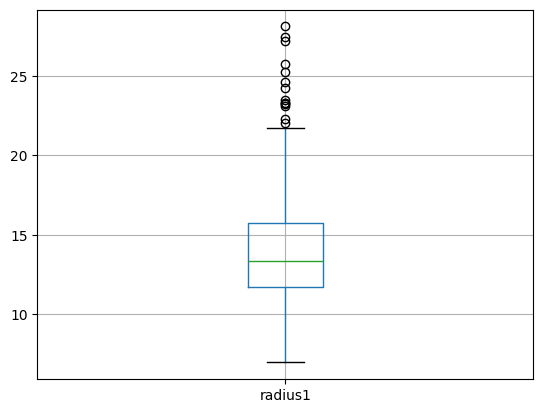

In [ ]:
#Box plot radius 1
X.boxplot(column=['radius1'])
plt.show()

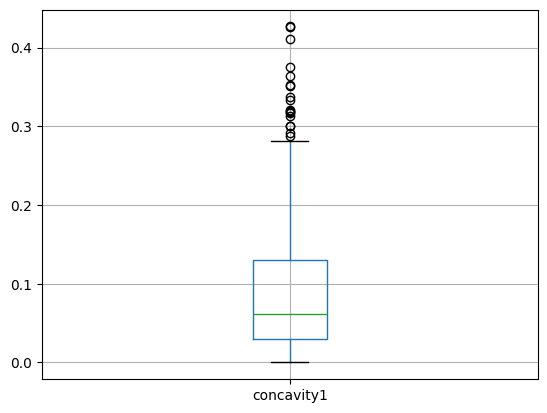

In [ ]:
#Box plot concavity1
X.boxplot(column=['concavity1'])
plt.show()

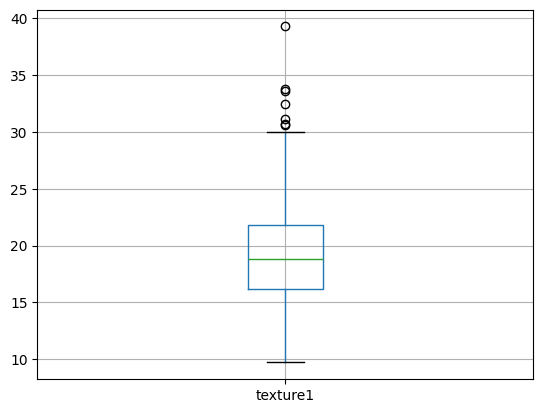

In [ ]:
#Box plot texture1
X.boxplot(column=['texture1'])
plt.show()

In [ ]:
df = pd.concat([X, y], axis=1)
df.head()


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


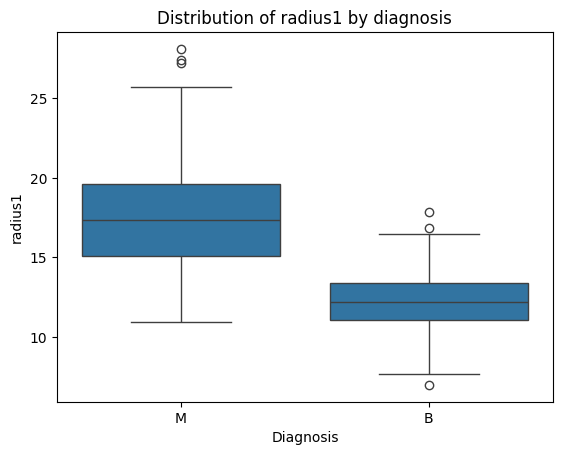

In [ ]:
sns.boxplot(x='Diagnosis', y='radius1', data=df)
plt.title('Distribution of radius1 by diagnosis')
plt.show()

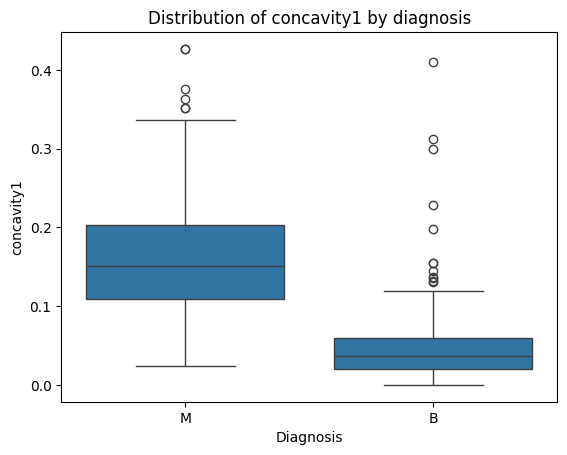

In [ ]:
sns.boxplot(x='Diagnosis', y='concavity1', data=df)
plt.title('Distribution of concavity1 by diagnosis')
plt.show()

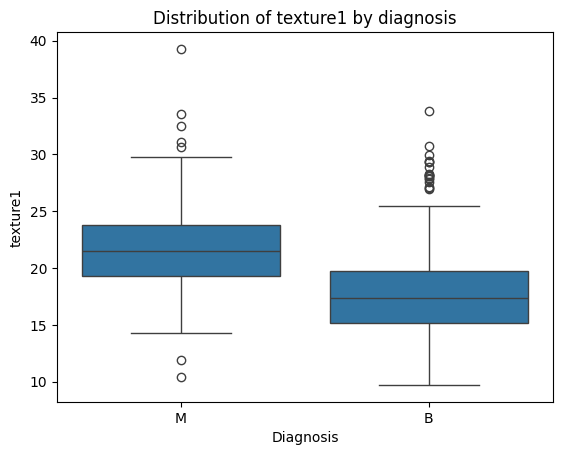

In [ ]:
sns.boxplot(x='Diagnosis', y='texture1', data=df)
plt.title('Distribution of texture1 by diagnosis')
plt.show()

Features and target were handled separately throughout the modeling pipeline. They were combined only temporarily for exploratory visualization purposes.

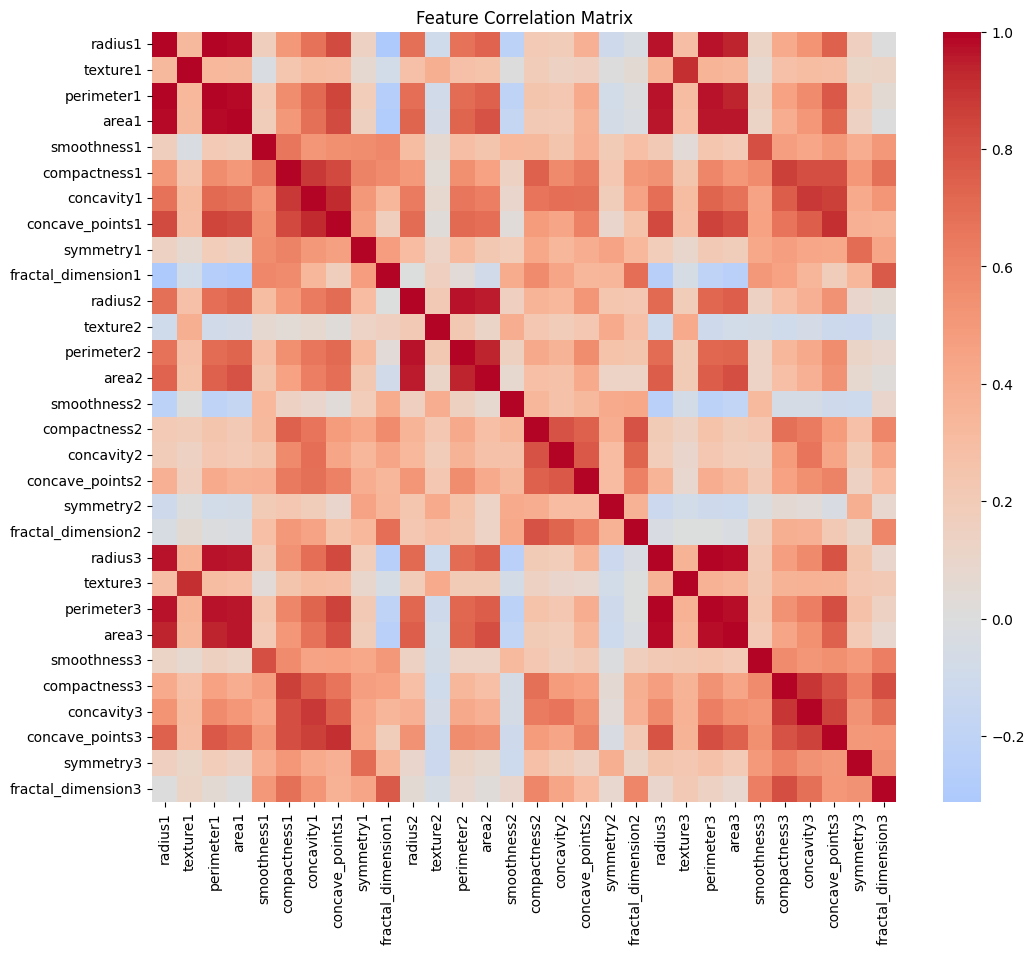

In [ ]:
X_corr = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(X_corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

The correlation matrix reveals strong correlations among size-related features and between different summary statistics of the same morphological descriptors. This redundancy is expected given the feature construction and does not pose an issue for the subsequent modeling approach.

# 4. Logistic Regression Model

In [ ]:
y = breast_cancer_wisconsin_diagnostic.data.targets['Diagnosis'] # hacer y una serie para calcular regresion.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)


# 5. Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9649122807017544

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm


array([[71,  1],
       [ 3, 39]])

In [ ]:
TN, FP, FN, TP = cm.ravel()

sensibilidad = TP / (TP + FN)
especificidad = TN / (TN + FP)

sensibilidad, especificidad


(np.float64(0.9285714285714286), np.float64(0.9861111111111112))

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
y_proba = model.predict_proba(X_test_scaled)[:, 1]


aca ver codigo de caht

In [ ]:
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {roc_auc:.4f}")

ROC AUC: 0.9960


In [ ]:
# Get the coefficients
coefficients = model.coef_[0]
# Get the feature names
feature_names = X.columns
# Create a DataFrame to display the coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False) #sort from highest to lowest coefficient
print(coefficients_df)

               Feature  Coefficient
21            texture3     1.434093
10             radius2     1.233325
28           symmetry3     1.061264
7      concave_points1     0.952813
26          concavity3     0.911406
13               area2     0.909029
23               area3     0.900477
20             radius3     0.896968
6           concavity1     0.782298
12          perimeter2     0.748295
22          perimeter3     0.723111
27     concave_points3     0.703999
1             texture1     0.482219
17     concave_points2     0.482089
3                area1     0.439950
24         smoothness3     0.420207
0              radius1     0.361150
2           perimeter1     0.353160
4          smoothness1     0.350622
14         smoothness2     0.247991
29  fractal_dimension3     0.054870
9   fractal_dimension1    -0.080865
16          concavity2    -0.092341
8            symmetry1    -0.163991
25        compactness3    -0.173488
18           symmetry2    -0.330658
11            texture2    -0

In [ ]:
y_test.unique()



array(['B', 'M'], dtype=object)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='M')
auc = roc_auc_score(y_test, y_proba)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label='M')
auc = roc_auc_score(y_test, y_proba)

print(f"ROC AUC: {auc:.4f}")



ROC AUC: 0.9960


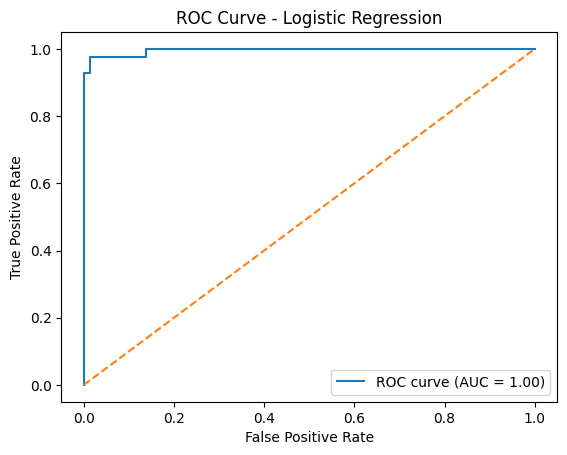

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

coef_df = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
})

coef_df

coef_df['abs_coefficient'] = coef_df['coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coefficient', ascending=False)

coef_df_sorted



,feature,coefficient,abs_coefficient
21,texture3,1.434093,1.434093
10,radius2,1.233325,1.233325
28,symmetry3,1.061264,1.061264
7,concave_points1,0.952813,0.952813
26,concavity3,0.911406,0.911406
13,area2,0.909029,0.909029
15,compactness2,-0.906925,0.906925
23,area3,0.900477,0.900477
20,radius3,0.896968,0.896968
6,concavity1,0.782298,0.782298


# 6. SQL Analysis
The cleaned dataset is stored in a SQLite database to demonstrate basic SQL querying skills.

In [ ]:
import sqlite3
conn = sqlite3.connect("cancer.db")
df.to_sql("cancer_data", conn, if_exists="replace", index=False)


569

Count by diagnosis

In [ ]:
query = """
SELECT Diagnosis, COUNT(*) AS Total
FROM cancer_data
GROUP BY Diagnosis;
"""
pd.read_sql(query, conn)


,Diagnosis,Total
0,B,357
1,M,212


Averages by diagnosis

In [ ]:
query = """
SELECT Diagnosis, AVG(radius1) AS AvgRadius
FROM cancer_data
GROUP BY Diagnosis
ORDER BY AvgRadius DESC;
"""
pd.read_sql(query, conn)

,Diagnosis,AvgRadius
0,M,17.462830
1,B,12.146524


Diagnosis for the top 5 radius values

In [ ]:
query = """
SELECT Diagnosis, radius1
FROM cancer_data
ORDER BY radius1 DESC
LIMIT 5;
"""
pd.read_sql(query, conn)

,Diagnosis,radius1
0,M,28.11
1,M,27.42
2,M,27.22
3,M,25.73
4,M,25.22


# Key Findings

Exploratory analysis and aggregated statistics indicate that malignant cases tend to present higher values in size-related features compared to benign cases.

The binary classification model achieves strong predictive performance, with high accuracy and ROC–AUC, indicating effective separation between diagnostic classes.

Analytical SQL queries confirm consistent differences between diagnostic groups and highlight top-ranking cases based on key numerical features.